# M8-L2 Problem 1

In this problem, you will create 3 regression networks with different complexities in PyTorch. By looking at the validation loss curves superimposed on the training loss curves, you should determine which model is optimal.

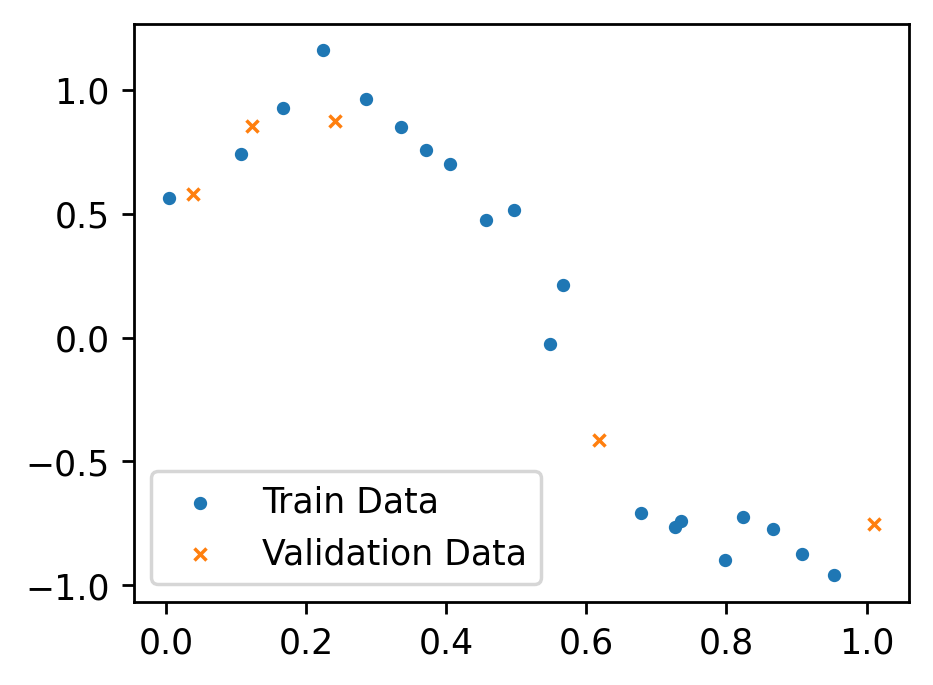

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim

def generate_data():
    np.random.seed(5)
    N = 25
    x = np.random.normal(np.linspace(0,1,N),0.01).reshape(-1,1)
    y = np.random.normal(np.sin(5*(x+0.082)),0.2)
    train_mask = np.zeros(N,dtype=np.bool_)
    train_mask[np.random.permutation(N)[:int(N*0.8)]] = True
    train_x, val_x = torch.Tensor(x[train_mask]), torch.Tensor(x[np.logical_not(train_mask)])
    train_y, val_y = torch.Tensor(y[train_mask]), torch.Tensor(y[np.logical_not(train_mask)])
    
    return train_x, val_x, train_y, val_y

def train(model, lr=0.0001, epochs=10000):
    train_x, val_x, train_y, val_y = generate_data()
    opt = optim.Adam(model.parameters(),lr=lr)
    lossfun = nn.MSELoss()
    train_hist = []
    val_hist = []

    for _ in range(epochs):
        model.train()
        loss_train = lossfun(train_y, model(train_x))
        train_hist.append(loss_train.item())

        model.eval()
        loss_val = lossfun(val_y, model(val_x))
        val_hist.append(loss_val.item())

        opt.zero_grad()
        loss_train.backward()
        opt.step()

    train_hist, val_hist = np.array(train_hist), np.array(val_hist)
    return train_hist, val_hist

def plot_loss(train_loss, val_loss):
    plt.plot(train_loss,label="Training")
    plt.plot(val_loss,label="Validation",linewidth=1)
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")

def plot_data(model = None):
    train_x, val_x, train_y, val_y = generate_data()
    plt.scatter(train_x, train_y,s=8,label="Train Data")
    plt.scatter(val_x, val_y,s=12,marker="x",label="Validation Data",linewidths=1)

    if model is not None:
        xvals = torch.linspace(0,1,1000).reshape(-1,1)
        plt.plot(xvals.detach().numpy(),model(xvals).detach().numpy(),label="Model",color="black")
    
    plt.legend(loc="lower left")

def get_loss(model):
    lossfun = nn.MSELoss()
    train_x, val_x, train_y, val_y = generate_data()
    loss_train = lossfun(train_y, model(train_x))
    loss_val = lossfun(val_y, model(val_x))
    return loss_train.item(), loss_val.item()


plt.figure(figsize=(4,3),dpi=250)
plot_data()
plt.show()

## Coding neural networks for regression

Here, create 3 neural networks from scratch. You can use `nn.Sequential()` to simplify things. Each network should have 1 input and 1 output. After each hidden layer, apply ReLU activation. Name the models `model1`, `model2`, and `model3`, with architectures as follows:

- `model1`: 1 hidden layer with 4 neurons. That is, the network should have a linear transformation from size 1 to size 4. Then a ReLU activation should be applied. Finally, a linear transformation from size 4 to size 1 gives the network output. (Note: Your regression network should not have an activation after the last layer!)

- `model2`: Hidden sizes (16, 16). (Two hidden layers, each with 16 neurons)

- `model3`: Hidden sizes (128, 128, 128). (3 hidden layers, each with 128 neurons)

In [2]:
# YOUR CODE GOES HERE
model1 = nn.Sequential(nn.Linear(1, 4), nn.ReLU(), nn.Linear(4, 1))

# Define model2
model2 = nn.Sequential(nn.Linear(1, 16), nn.ReLU(), nn.Linear(16, 16), nn.ReLU(), nn.Linear(16, 1))

# Define model3
model3 = nn.Sequential(nn.Linear(1, 128), nn.ReLU(), nn.Linear(128, 128), nn.ReLU(), nn.Linear(128, 128), nn.ReLU(), nn.Linear(128, 1)
)

## Training and Loss curves

The following cell calls the provided function `train` to train each of your neural network models. The training and validation curves are then displayed.

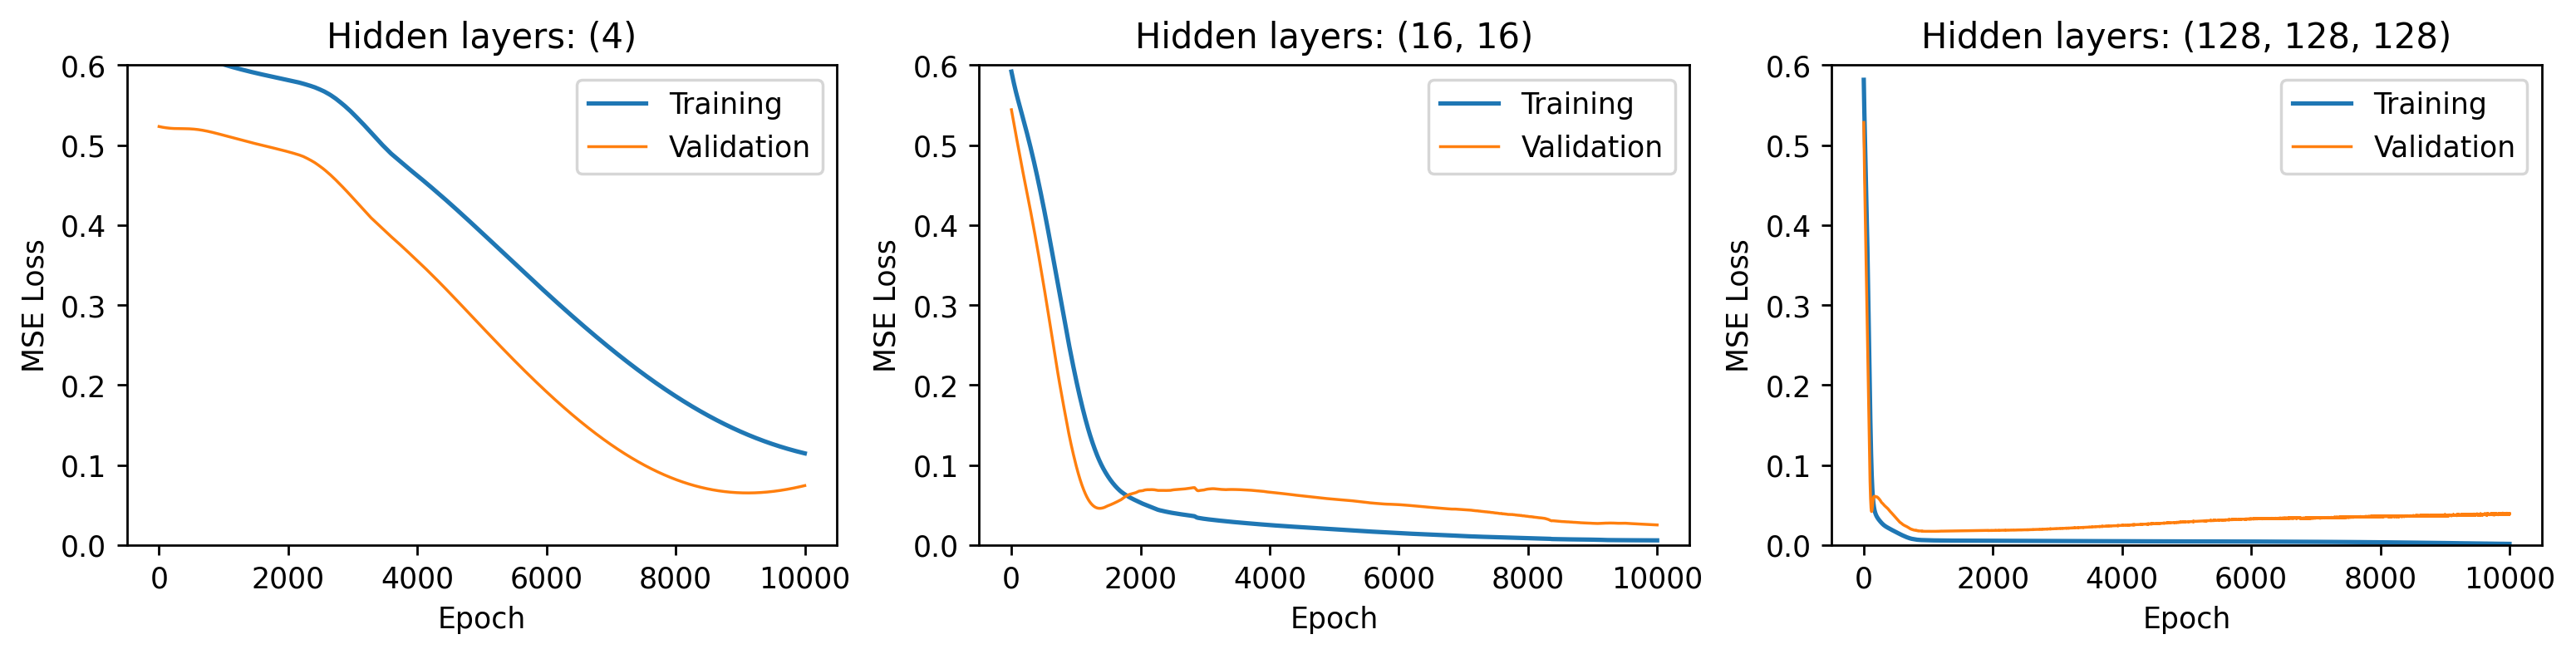

In [3]:
hidden_layers=["(4)","(16, 16)","(128, 128, 128)"]

plt.figure(figsize=(15,3),dpi=250)
for i,model in enumerate([model1, model2, model3]):
    loss_train, loss_val = train(model)
    plt.subplot(1,3,i+1)
    plot_loss(loss_train, loss_val)
    plt.ylim(0,0.6)
    plt.title(f"Hidden layers: {hidden_layers[i]}")
plt.show()

## Model performance
Let's print the values of MSE on the training and testing/validation data after training. Make note of which model is "best" (has lowest testing error).

In [4]:
for i, model in enumerate([model1, model2, model3]):
    train_loss, val_loss = get_loss(model)
    print(f"Model {i+1}, hidden layers {hidden_layers[i]:>15}:   Train MSE: {train_loss:.4f}    Test MSE: {val_loss:.4f}")


Model 1, hidden layers             (4):   Train MSE: 0.1145    Test MSE: 0.0743
Model 2, hidden layers        (16, 16):   Train MSE: 0.0058    Test MSE: 0.0251
Model 3, hidden layers (128, 128, 128):   Train MSE: 0.0014    Test MSE: 0.0380


## Visualization
Now we can look at how good each model's predictions are. Run the following cell to generate a visualization plot, then answer the questions.

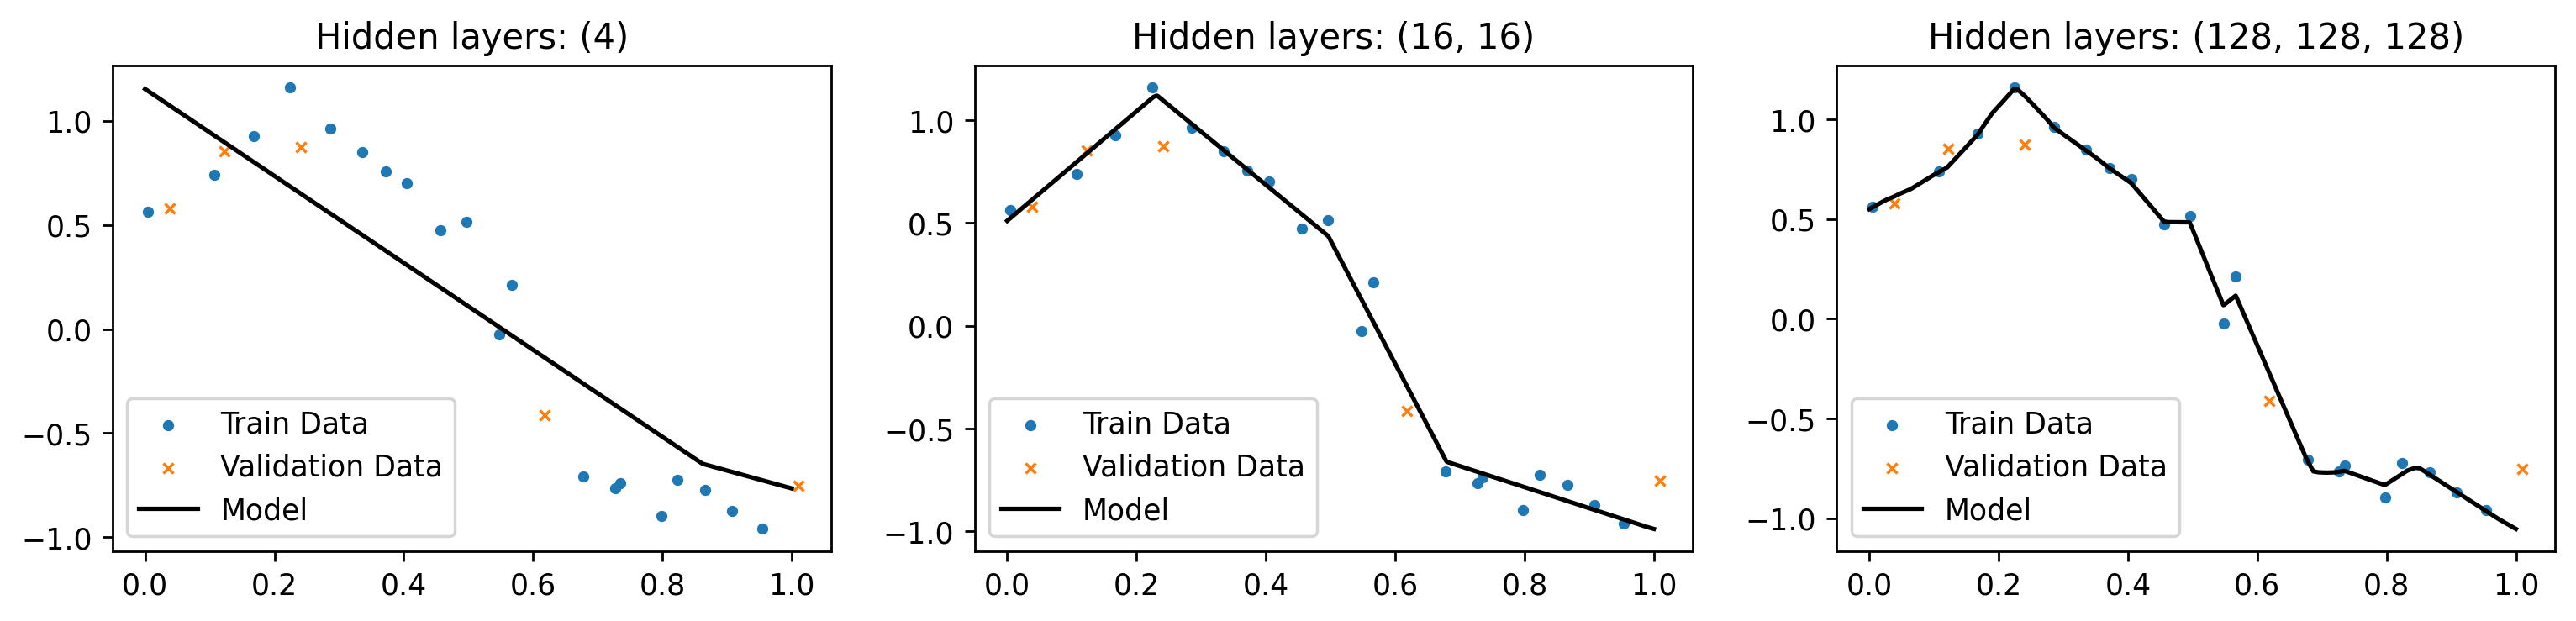

In [5]:
plt.figure(figsize=(15,3),dpi=250)
for i,model in enumerate([model1, model2, model3]):
    plt.subplot(1,3,i+1)
    plot_data(model)
    plt.title(f"Hidden layers: {hidden_layers[i]}")
plt.show()

## Questions

1. For the model that overfits the most, describe what happens to the loss curves while training.  


2. For the model that underfits the most, describe what happens to the loss curves while training.  


3. For the "best" model, what happens to the loss curves while training?  


1. model3: The training loss decreases quickly and stays very low, indicating that the model is fitting well to the training data. However, the validation loss starts to increase after an initial decrease, showing that the model is fittiing to the training data too well but struggling to generalize to the validation set. This pattern is seen typically in overfitting.

2. model1: Both training and validation losses decrease, but they do so at a relatively less pace.
The losses don't reach very low values, indicating that the model fails to capture the complexity of the underlying data distribution. This shows underfitting.

3. model2: Both the training and validation losses decrease and eventually stabilize at low values.
The gap between training and validation loss remains small, indicating a good balance between fitting the training data and generalizing to unseen data. This suggests that model2 has the is designed well for the data complexity, making it the most appropriate model in this case.